# Unraveling causal structure

The goal of this notebook is to figure out why in some cases random graphs do not generate similar causal structures for the driver-node. 

# ideas
- Monte-carlo samples omhoog gooien voor geteste graaf. 
- Nudge size met netwerk spelen -> hoger contrast
- Identificeerbaarheid met mi. Rank-test of standard error of the mean. 
- 

In [302]:
# load modules and datasets
%load_ext autoreload
import numpy as np, sys, os, holoviews as hv, scipy
sys.path.insert(0, '../') # add normal modules
from Utils import IO, plotting as plotz, stats
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-notebook')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
root = '../Data/new23/2019-07-17T16:12:39.222900'
data = IO.DataLoader(root)
data = {os.path.join(root, k): v for k,v in data.items()}
settings = IO.loadSets(data)



















  0%|          | 0/420 [00:00<?, ?it/s]

Extracting data...
Done
Reading settings in ../Data/new23/2019-07-17T16:12:39.222900/2019-07-17T16:12:39.222919: using json
loading graph




















  0%|          | 1/420 [00:00<02:19,  3.01it/s]

















  1%|          | 3/420 [00:00<02:01,  3.43it/s]

















  1%|          | 5/420 [00:00<01:38,  4.23it/s]

















  1%|          | 5/420 [00:01<01:38,  4.23it/s]

















  1%|▏         | 6/420 [00:01<02:49,  2.44it/s]

















  2%|▏         | 7/420 [00:01<04:03,  1.69it/s]

















  2%|▏         | 8/420 [00:02<04:03,  1.69it/s]

















  2%|▏         | 8/420 [00:02<04:03,  1.69it/s]

















  2%|▏         | 9/420 [00:02<04:32,  1.51it/s]

















  2%|▏         | 10/420 [00:03<04:55,  1.39it/s]

















  3%|▎         | 11/420 [00:03<04:20,  1.57it/s]

















  3%|▎         | 12/420 [00:03<03:56,  1.73it/s]

















  3%|▎         | 13/420 [00:03<03:22,  2.01it/s]

















  3%|▎         | 14/420 [00:03<02:49,  2.39it/s]

















  4%|▎         | 15/420 [00:04<03:33,  1.90it/s]

















 

 17%|█▋        | 72/420 [00:16<01:32,  3.76it/s]

















 17%|█▋        | 73/420 [00:16<01:39,  3.50it/s]

















 17%|█▋        | 73/420 [00:16<01:39,  3.50it/s]

















 17%|█▋        | 73/420 [00:16<01:39,  3.50it/s]

















 18%|█▊        | 75/420 [00:16<01:18,  4.39it/s]

















 18%|█▊        | 76/420 [00:16<01:15,  4.58it/s]

















 18%|█▊        | 76/420 [00:16<01:15,  4.58it/s]

















 19%|█▉        | 79/420 [00:16<00:51,  6.66it/s]

















 19%|█▉        | 80/420 [00:16<00:40,  8.43it/s]

















 19%|█▉        | 81/420 [00:16<00:40,  8.43it/s]

















 20%|██        | 85/420 [00:17<00:25, 12.92it/s]

















 20%|██        | 85/420 [00:17<00:25, 12.92it/s]

















 21%|██        | 87/420 [00:17<00:27, 12.18it/s]

















 21%|██        | 88/420 [00:17<00:25, 12.77it/s]

















 21%|██▏       | 90/420 [00:17<00:32, 10.30it/s]

















 22%|██▏  

 37%|███▋      | 154/420 [00:25<01:42,  2.61it/s]

















 37%|███▋      | 155/420 [00:25<01:48,  2.44it/s]

















 37%|███▋      | 155/420 [00:25<01:48,  2.44it/s]

















 37%|███▋      | 155/420 [00:25<01:48,  2.44it/s]

















 37%|███▋      | 155/420 [00:25<01:48,  2.44it/s]

















 37%|███▋      | 155/420 [00:25<01:48,  2.44it/s]

















 37%|███▋      | 157/420 [00:25<01:21,  3.24it/s]

















 38%|███▊      | 158/420 [00:25<01:00,  4.33it/s]

















 38%|███▊      | 160/420 [00:25<00:55,  4.71it/s]

















 39%|███▉      | 163/420 [00:25<00:41,  6.21it/s]

















 39%|███▉      | 163/420 [00:26<00:41,  6.21it/s]

















 39%|███▉      | 163/420 [00:26<00:41,  6.21it/s]

















 39%|███▉      | 164/420 [00:26<00:46,  5.49it/s]

















 40%|███▉      | 167/420 [00:26<00:44,  5.71it/s]

















 40%|████      | 169/420 [00:26<00:33,  7.46it/s]














 56%|█████▌    | 234/420 [00:33<01:10,  2.62it/s]

















 56%|█████▌    | 235/420 [00:34<01:01,  3.01it/s]

















 57%|█████▋    | 238/420 [00:34<00:36,  4.96it/s]

















 57%|█████▋    | 240/420 [00:34<00:41,  4.30it/s]

















 58%|█████▊    | 242/420 [00:35<00:46,  3.87it/s]

















 58%|█████▊    | 242/420 [00:35<00:46,  3.87it/s]

















 58%|█████▊    | 242/420 [00:35<00:46,  3.87it/s]

















 58%|█████▊    | 243/420 [00:35<01:07,  2.62it/s]

















 58%|█████▊    | 243/420 [00:35<01:07,  2.62it/s]

















 58%|█████▊    | 243/420 [00:35<01:07,  2.62it/s]

















 58%|█████▊    | 244/420 [00:35<01:17,  2.28it/s]

















 58%|█████▊    | 245/420 [00:35<01:10,  2.49it/s]

















 59%|█████▊    | 246/420 [00:36<01:13,  2.37it/s]

















 59%|█████▉    | 247/420 [00:36<01:04,  2.69it/s]

















 59%|█████▉    | 248/420 [00:36<00:55,  3.10it/s]














 72%|███████▏  | 303/420 [00:43<00:23,  4.88it/s]

















 73%|███████▎  | 306/420 [00:44<00:19,  5.90it/s]

















 73%|███████▎  | 307/420 [00:44<00:21,  5.31it/s]

















 73%|███████▎  | 308/420 [00:44<00:46,  2.43it/s]

















 74%|███████▎  | 309/420 [00:45<00:47,  2.32it/s]

















 74%|███████▍  | 311/420 [00:45<00:56,  1.94it/s]

















 74%|███████▍  | 312/420 [00:45<00:53,  2.02it/s]

















 74%|███████▍  | 312/420 [00:45<00:53,  2.02it/s]

















 74%|███████▍  | 312/420 [00:45<00:53,  2.02it/s]

















 75%|███████▍  | 314/420 [00:45<00:41,  2.56it/s]

















 75%|███████▌  | 315/420 [00:45<00:43,  2.41it/s]

















 75%|███████▌  | 315/420 [00:45<00:43,  2.41it/s]

















 75%|███████▌  | 316/420 [00:45<00:39,  2.63it/s]

















 75%|███████▌  | 316/420 [00:45<00:39,  2.63it/s]

















 75%|███████▌  | 317/420 [00:46<00:36,  2.86it/s]














 92%|█████████▏| 386/420 [00:52<00:02, 12.60it/s]

















 93%|█████████▎| 389/420 [00:53<00:03,  8.98it/s]

















 93%|█████████▎| 390/420 [00:53<00:03,  8.13it/s]

















 93%|█████████▎| 392/420 [00:53<00:03,  9.05it/s]

















 94%|█████████▍| 394/420 [00:53<00:03,  8.52it/s]

















 94%|█████████▍| 396/420 [00:53<00:02,  8.32it/s]

















 94%|█████████▍| 396/420 [00:53<00:02,  8.32it/s]

















 95%|█████████▍| 397/420 [00:53<00:03,  6.58it/s]

















 95%|█████████▍| 398/420 [00:53<00:03,  6.87it/s]

















 95%|█████████▌| 399/420 [00:54<00:02,  7.51it/s]

















 95%|█████████▌| 400/420 [00:54<00:02,  8.04it/s]

















 95%|█████████▌| 401/420 [00:54<00:02,  7.07it/s]

















 96%|█████████▌| 402/420 [00:54<00:02,  7.75it/s]

















 96%|█████████▌| 404/420 [00:54<00:01,  8.94it/s]

















 97%|█████████▋| 407/420 [00:54<00:01,  7.27it/s]














In [242]:
aucs = {}
params = dict(\
             maxfev = int(1e6),\
             bounds = (0, np.inf),\
             )
func = lambda x, a, b, c, d, e, f, g: a + b * np.exp(- c * (x - d)) + e * np.exp(- f * (x - g))
from tqdm import tqdm_notebook as tqdm
for k, setting in tqdm(settings.items()):
    s = setting.data.shape
    tmp = setting.data.reshape(-1, s[-1])
    print(tmp.shape, s)
    aucs[k] = stats.aucs(tmp, func, params = params).reshape(s[:-1])

(600, 24) (3, 1, 20, 10, 24)


TypeError: least_squares() got an unexpected keyword argument 'jacobian'

In [160]:
percentages = []
for idx, (k, auc) in enumerate(aucs.items()):
    tmp = auc.squeeze()
    tmp = np.argsort(tmp, axis = -1)
    print(tmp[:, 0, -3:])
    x = tmp[0, ..., -1] == tmp[[1, 2], ..., -1]
    percentages.append(x)
percentages = np.array(percentages)
print(percentages.shape, tmp.shape, x.shape)
print(percentages.mean(0))    

[[4 9 7]
 [4 7 9]
 [2 1 3]]
(1, 2, 20) (3, 20, 10) (2, 20)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<IPython.core.display.Javascript object>


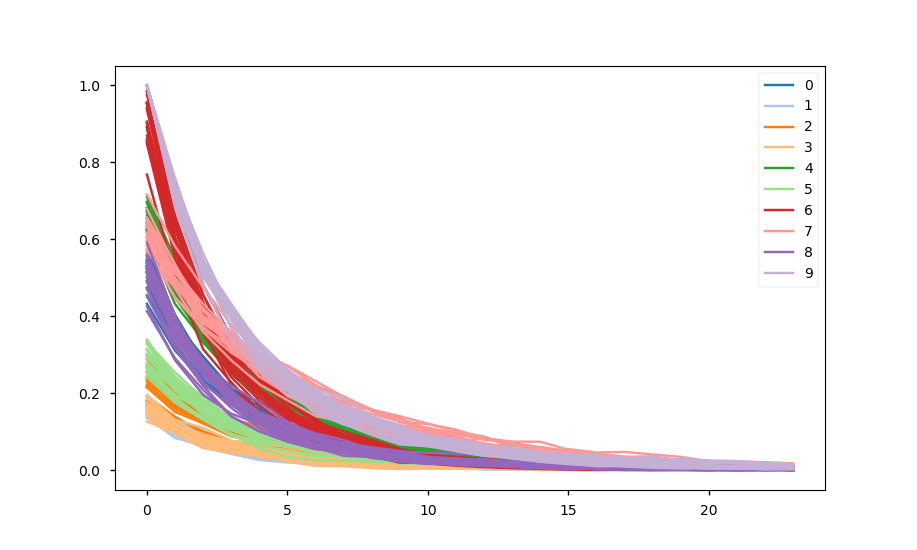

(3, 20, 10, 24)


In [296]:
%matplotlib notebook
fig, ax = plt.subplots()
zdx = 1
for k, setting in settings.items():
    colors = plt.cm.tab20(range(settings[k].nNodes))
    v = setting.data.squeeze()
    print(v.shape)
    for node in range(setting.nNodes):
        ax.plot(v[zdx, ..., node, :].T, color = colors[node], label = node)
# ax.set(xscale = 'linear', yscale = 'log')
elems = [plt.Line2D([0], [0], color = c, label = idx) for idx, c in enumerate(colors)]
ax.legend(handles = elems)
fig.show()

<IPython.core.display.Javascript object>


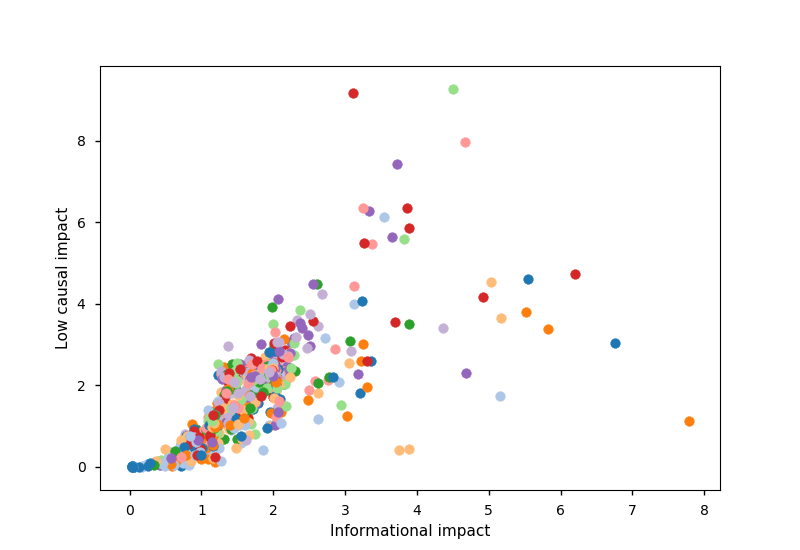

In [61]:
import matplotlib.pyplot as plt
II  = 'Informational impact'
LCI = 'Low causal impact'
HCI = 'High causal impact'
fig, ax = plt.subplots()
sets = [0, 1]
for k, v in aucs.items():
    v = v[sets].squeeze()
    colors = plt.cm.tab20(range(settings[k].nNodes))
    for node in range(settings[k].nNodes):
        ax.scatter(*v[...,node], color = colors[node], label = node)
ax.set(xlabel = II, ylabel = LCI)
# ax.legend()
fig.show()

(20, 10) (20, 10, 24)


<IPython.core.display.Javascript object>


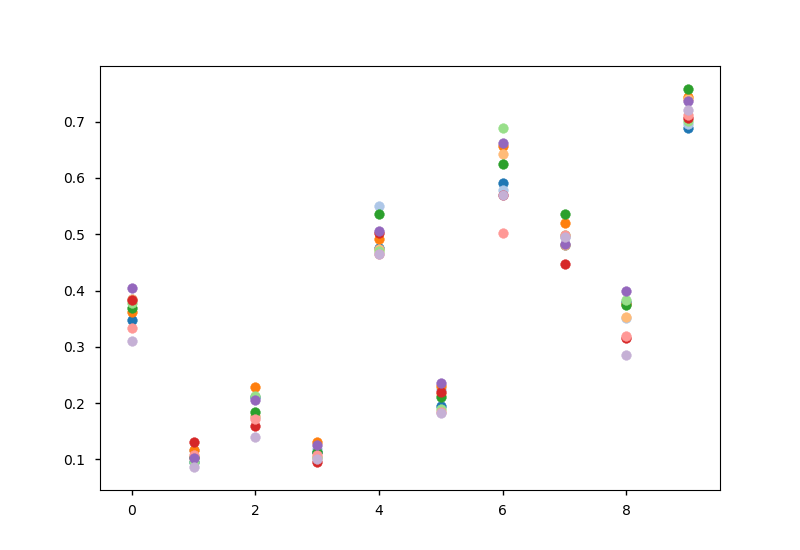

<IPython.core.display.Javascript object>


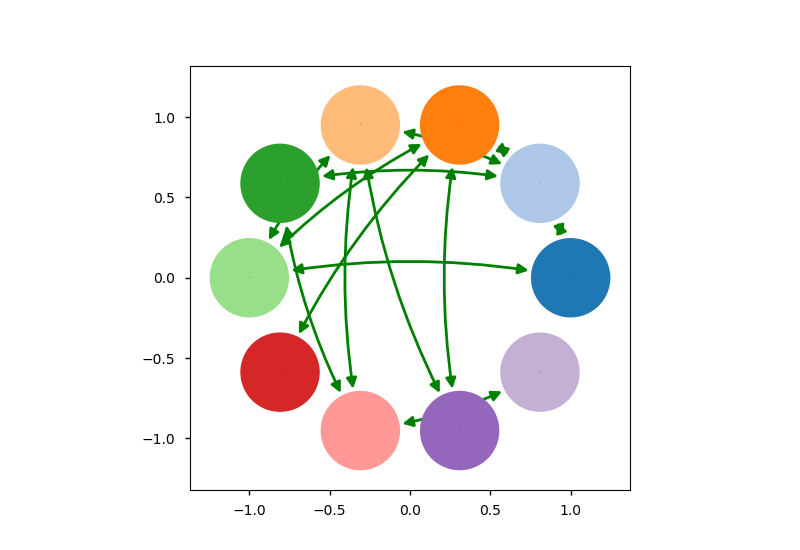


-------------------------------- Simulation Settings --------------------------------
directory       = /var/scratch/cveltere/2019-07-17T16:12:39.222900/2019-07-17T16:12:39.222919
repeats         = 10000
deltas          = 50
nSamples        = 10000
step            = 1000
burninSamples   = 0
nNodes          = 10
nTrials         = 20
pulseSizes      = [0.5, inf]
nudgeType       = constant
updateType      = 0.25
model           = Ising
data            = [[[[[5.94339789e-01 3.43927039e-01 2.33242990e-01 ... 1.80904079e-03
     1.51044264e-03 1.11377822e-03]
    [3.27107806e-01 1.89304377e-01 1.35883827e-01 ... 3.12957894e-03
     2.42388635e-03 2.08730126e-03]
    [4.11580807e-01 2.56962121e-01 1.91606644e-01 ... 3.14730902e-03
     2.58156942e-03 2.02312753e-03]
    ...
    [6.90331294e-01 4.53275084e-01 3.44439652e-01 ... 9.32228171e-03
     7.77831925e-03 6.42724773e-03]
    [6.06473600e-01 3.50572111e-01 2.41731445e-01 ... 1.51664826e-03
     1.19787538e-03 1.00983950e-03]
    [1.0000

()


In [303]:
lci = np.array([i.data[1] for i in settings.values()]).squeeze()
trials, nodes, t = lci.shape

mu = lci.mean(0)
se = lci.std(0) / np.sqrt(trials)
zdx = 2
tmp = lci[..., 1]
print(tmp.shape, lci.shape)
x = np.arange(lci.shape[1])
fig, ax = plt.subplots()
[ax.scatter(x, i, color = c) for i, c in zip(tmp, colors)]
fig.show()

for setting in settings.values():
    fig, ax = plt.subplots()
    g = nx.node_link_graph(setting.graph)
    
    plotz.addGraphPretty(g, ax = ax)
tmp = np.asarray(aucs.values())
print(tmp.shape)

IO.savePickle('../test_this.pickle', nx.node_link_graph(setting.graph))
# times = []
# for trial in range(trials):
#     for ti in range(t):
#         leader = np.argmax(lci[trial, :, ti])
#         val = lci[trial, leader, ti]
#         if val > mu[t]

(3, 10, 24) (3, 10, 24)


<IPython.core.display.Javascript object>


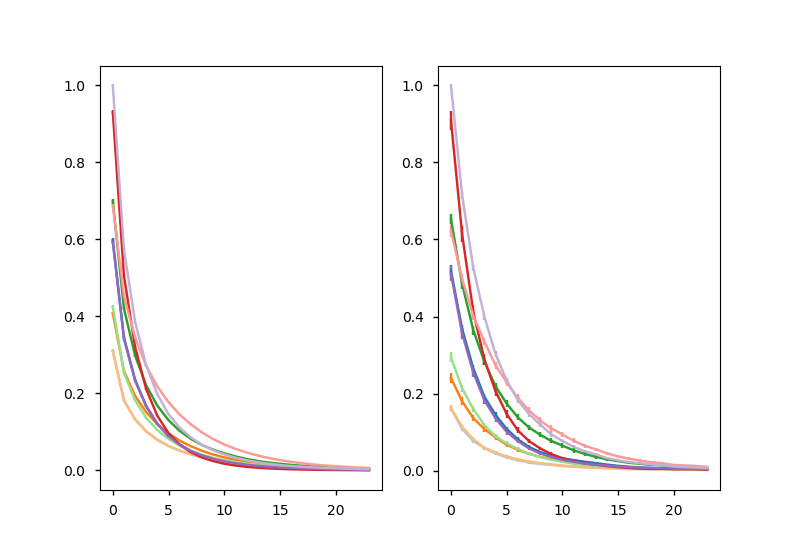

In [301]:
d = np.array([i.data for i in settings.values()]).squeeze()
av = d.mean(1)
er = d.std(1) / np.sqrt(20)
print(av.shape, er.shape)
x = np.arange(24)
%matplotlib notebook
fig, ax = plt.subplots(1, 2)
for idx, c in enumerate(colors):
    for s, axi in zip([0, 1], ax):
        axi.errorbar(x, av[s, idx], yerr = 2 * er[s, idx],  color = c)
fig.show()


In [268]:
np.trapz(av, axis = -1)

array([[1.54074216, 0.98380414, 1.42059389, 0.99429613, 2.11904878,
        1.28500159, 1.97061815, 2.6117414 , 1.53611612, 2.58703249],
       [1.74867264, 0.55996018, 0.99540228, 0.59050577, 2.62456691,
        1.09293303, 2.5533965 , 3.15208419, 1.65830592, 3.61750322],
       [2.50560247, 4.95964245, 4.86418498, 4.98898974, 2.79197996,
        3.98606864, 1.11632161, 4.03954836, 2.48651936, 1.34128039]])